# Smith Kaart Oefening 4

In [1]:
from cursusdef import *

## Opgave

Gebruik je Smith kaart om een antenne van 150 Ohm aan te passen aan een coax van 50 Ohm voor een frequentie van 600 MHz ($\lambda$= 25 cm; $\epsilon_{r}$=4)? Welke verschillende oplossingen zijn er mogelijk?

## Oplossing

Er zijn hiervoor 8 oplossingen mogelijk.

We bespreken hieronder elk van deze 8 oplossing:

### Oplossing 1: Bijplaatsen van een capaciteit in serie

We plaatsen $z= \frac{Z_L}{Z_0}=3$ op de Smith kaart (rode dotje) en we zoeken waar we de r=1 cirkel snijden in het bovenste deel van de Smith kaart (groene dotje).

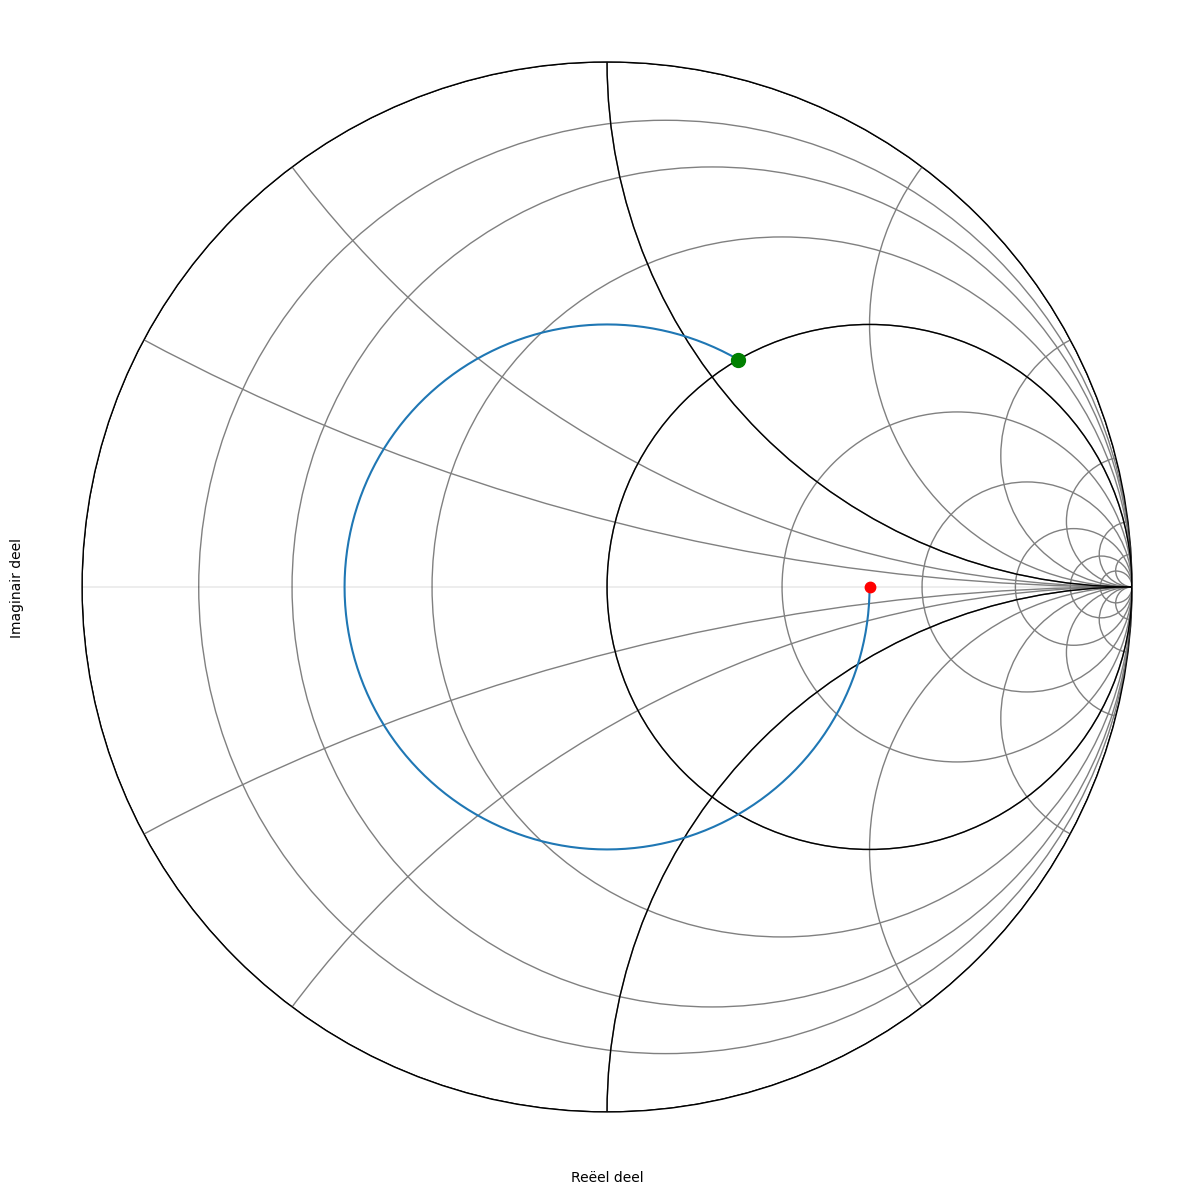

In [2]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=31, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(301)]
def smitplot(zlijn,Z_0,tt='z'):
    gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, chart_type=tt, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
smitplot(zlijn,Z_0)

Als we van de aanpassing (groene )) naar de belasting gaan (rode )), draaien we in tegenwijzerzin over een afstand van $300^o$. Dit geeft een afstand van $\frac{300}{360}\frac{\lambda}{2}$=0.416 $\lambda$ = 10.41cm.    ($\lambda$= 25 cm is gegeven)

De nieuwe z = 1 + j 1.15. Daaruit volgt dat Z = 50 Ohm + j 57.5 Ohm (zie Table 1). Het complexe deel van deze impedantie kunnen we compenseren door een condensator met impedantie van ongeveer - j 57.5 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van de lijnimpedantie (zie Table 1) juist gaan kijken waar het reële deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ \frac{1}{j \omega C}= - j 57.5 \Omega$$

Als we vervolgens $\omega$ invullen, wetende dat de frequentie f=600 MHz:

$$ \omega= 2 \pi \cdot  600\times 10^6 $$

$$ C= 4.59 pF  $$

In [3]:
1/57.73502691896258/6e8/2/np.pi

4.594407461848266e-12

In [4]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[(i,line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(297,303)]
def zlijnprint(zlijn,golflengte=25):
    print('hoek    impedantie (Ohm)     lengte coax (cm)')
    for i,zi in zlijn:
        print('{:4}  Z= {:.2f}{:+.2f}j Ohm     lengte={:.2f} cm'.format(i,zi.real,zi.imag, i/360*golflengte/2))
zlijnprint(zlijn)

hoek    impedantie (Ohm)     lengte coax (cm)
 297  Z= 47.11+55.97j Ohm     lengte=10.31 cm
 298  Z= 48.04+56.56j Ohm     lengte=10.35 cm
 299  Z= 49.01+57.15j Ohm     lengte=10.38 cm
 300  Z= 50.00+57.74j Ohm     lengte=10.42 cm
 301  Z= 51.02+58.31j Ohm     lengte=10.45 cm
 302  Z= 52.08+58.89j Ohm     lengte=10.49 cm


<p class=tabcaption> Overzicht van de bekomen impedantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
De optimale condensatorwaarde in serie wordt dus  4.59 pF en de nodige lengte van de coax tussen de antenne en de aanpassing is 10.4 cm
</p>

Het schema dat we nodig hebben om deze eerst oplossing te realiseren wordt dus:

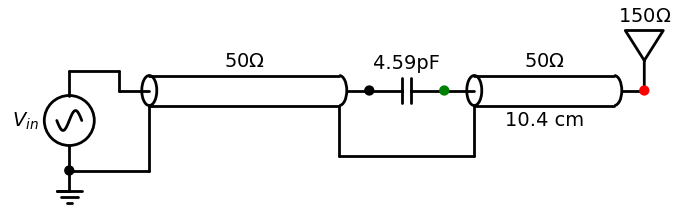

In [5]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot())
d.add(Capacitor(l=1.5, label='4.59pF'))
d.add(Dot(color='g'))
coax2=d.add(Coax(l=1.5,length=4, label=r'$50\Omega$', botlabel='10.4 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend,l=1,d='down'))
d.add(Line(tox=coax2.shieldstart,d='right') )     
d.add(Line(toy=coax2.shieldstart,d='up') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 2: Bijplaatsen van een inductantie in serie

We plaatsen $\frac{Z_L}{Z_0}=3$ op de Smith kaart en we zoeken waar we de r=1 cirkel snijden in het onderste deel van de kaart.

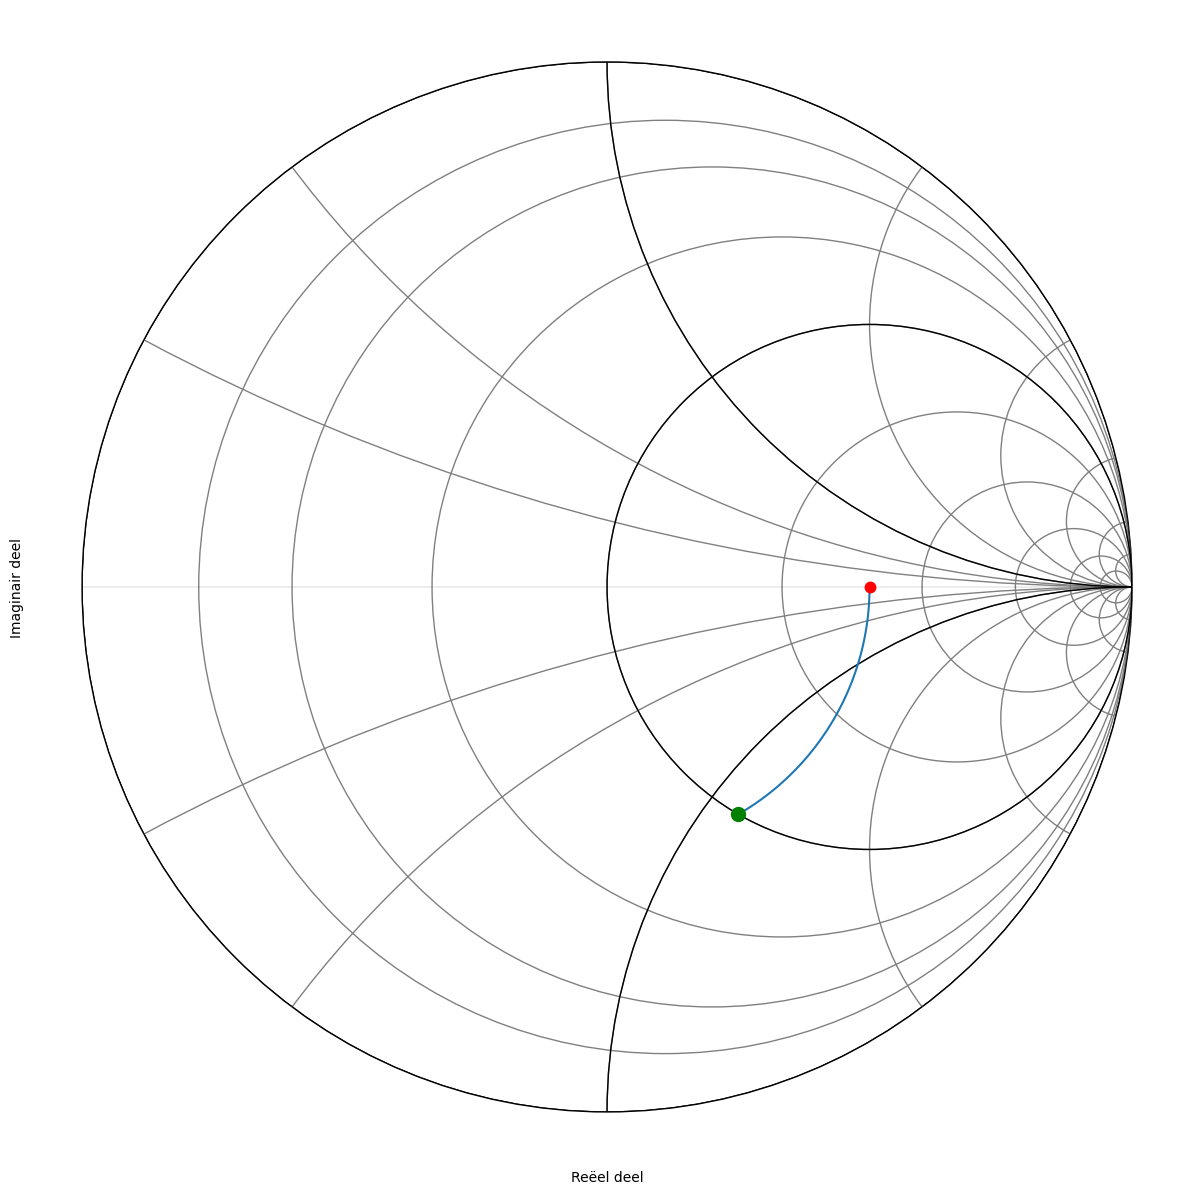

In [6]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(61)]
smitplot(zlijn,Z_0)

We zoomen vervolgens in op het deel van de cirkel die de eenheidscirkel snijdt.

In [7]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[(i,line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(57,62)]
zlijnprint(zlijn,golflengte=25)

hoek    impedantie (Ohm)     lengte coax (cm)
  57  Z= 53.16-59.45j Ohm     lengte=1.98 cm
  58  Z= 52.08-58.89j Ohm     lengte=2.01 cm
  59  Z= 51.02-58.31j Ohm     lengte=2.05 cm
  60  Z= 50.00-57.74j Ohm     lengte=2.08 cm
  61  Z= 49.01-57.15j Ohm     lengte=2.12 cm


<p class=tabcaption> Overzicht van de bekomen impedantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [8]:
zlijn

[(np.int64(57), np.complex128(53.16426888011715-59.449743434788104j)),
 (np.int64(58), np.complex128(52.07749372723773-58.88562587730956j)),
 (np.int64(59), np.complex128(51.02305128991642-58.31372153035076j)),
 (np.int64(60), np.complex128(50.00000000000001-57.73502691896258j)),
 (np.int64(61), np.complex128(49.00741173990236-57.15046413815093j))]

De nieuwe z = 1 - j 1.15. Daaruit volgt dat Z = 50 Ohm - j 57.7 Ohm. Het complexe deel van deze impedantie kunnen we compenseren door een spoel met impedantie van ongeveer  j 57.7 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van zlijn juist gaan kijken waar het reële deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ j \omega L=  j 57.7 \Omega$$

$$ \omega= 2 \pi \cdot 600 \times 10^6 $$

$$ L=15 nH $$

In [9]:
57.73502691896258/2/np.pi/6e8

1.5314691539494226e-08

Het schema dat we nodig hebben om deze tweede oplossing te realiseren wordt dus:

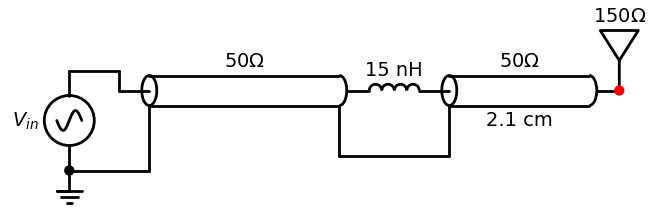

In [10]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))

d.add(Inductor(l=1, label='15 nH'))

coax2=d.add(Coax(l=1.5,length=4, label=r'$50\Omega$', botlabel='2.1 cm'))
d.add(Dot( color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend,l=1,d='down'))
d.add(Line(tox=coax2.shieldstart,d='right') )     
d.add(Line(toy=coax2.shieldstart,d='up') )     

d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

<p class="alert alert-success">
De optimale inductantiewaarde in serie wordt dus  15 nH en de nodige lengte van de coax tussen de antenne en de aanpassing is 2.1 cm
</p>

### Oplossing 3: Bijplaatsen van een capaciteit in parallel

We plaatsen $\frac{Z_L}{Z_0}=3$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

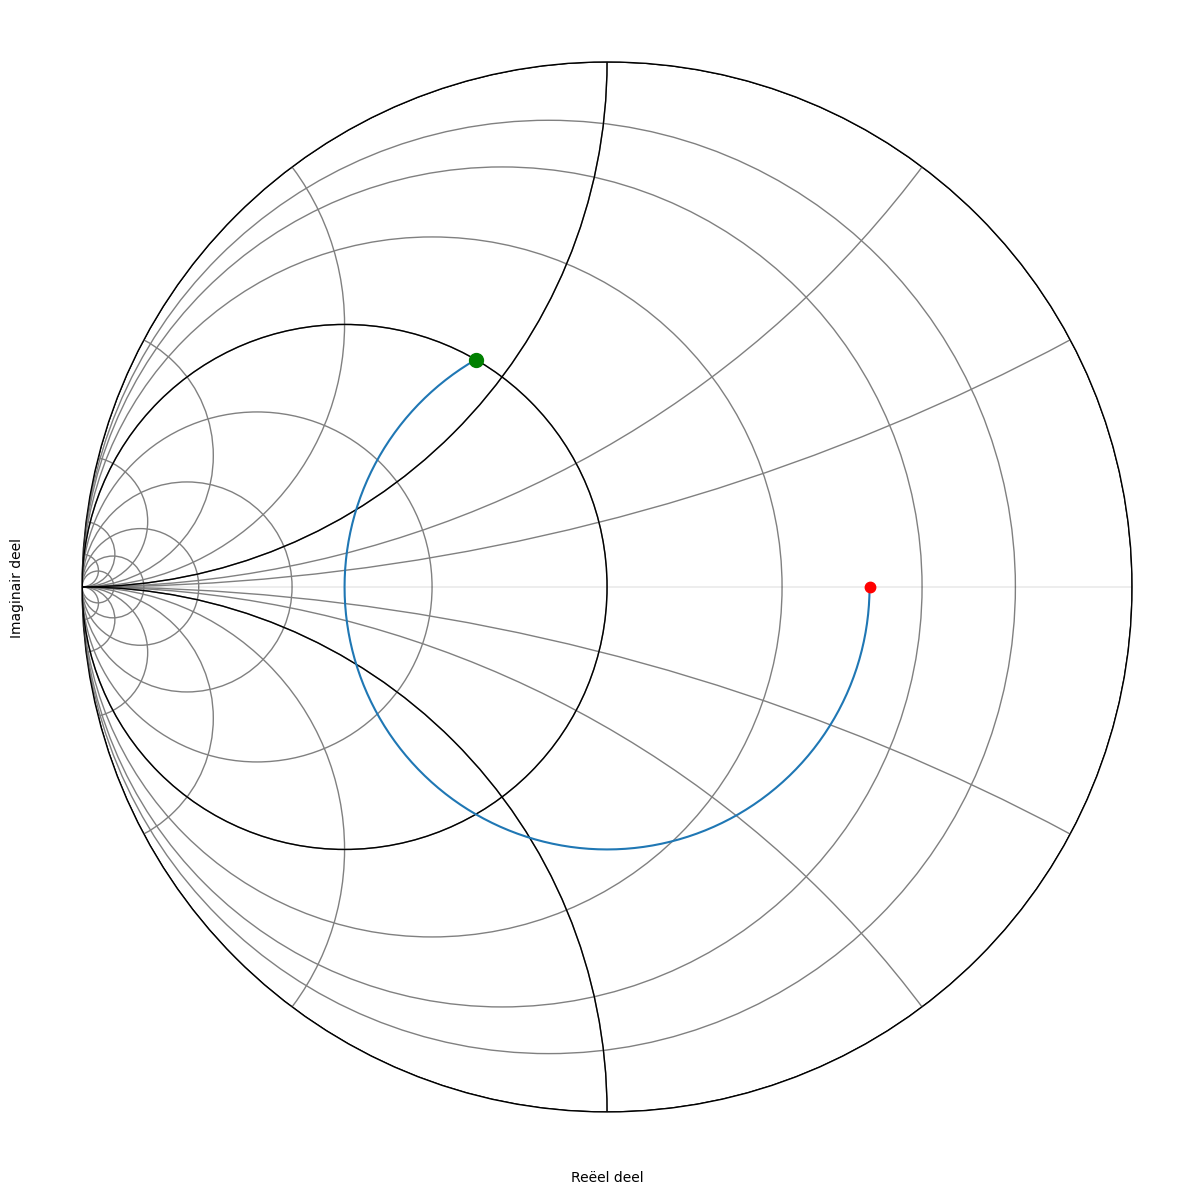

In [11]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=31, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,241)]
smitplot(zlijn,Z_0,tt='y')

Omdat een Smith kaart in admittantie het spiegelbeeld is van een Smith kaart in impedantie, kunnen we ook de kaart spiegelen. We moeten dan wel aan de andere kant van de kaart vertrekken. Dit is weergegeven in figuur 6.

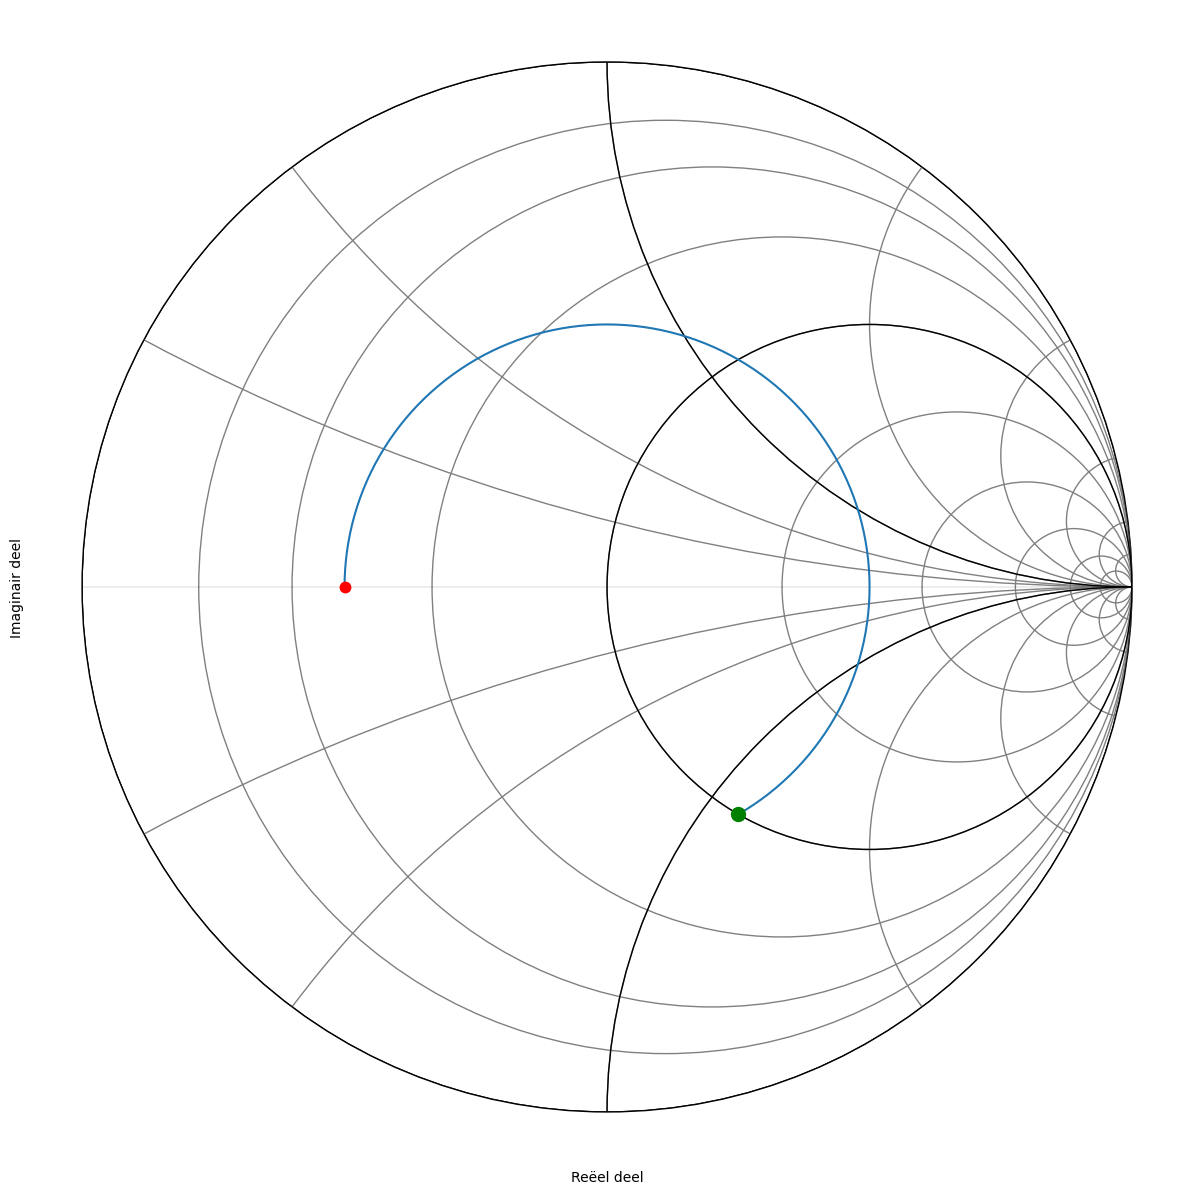

In [12]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,241)]
smitplot(ylijn,Y_0)

In [13]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(237,243)]
def ylijnprint(ylijn,golflengte=25):
    print('hoek    admittantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}    Y= {:-.2f}{:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.real*1000,yi.imag*1000, i/360*golflengte/2))
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 237    Y= 21.27-23.78j mS     lengte=8.23 cm
 238    Y= 20.83-23.55j mS     lengte=8.26 cm
 239    Y= 20.41-23.33j mS     lengte=8.30 cm
 240    Y= 20.00-23.09j mS     lengte=8.33 cm
 241    Y= 19.60-22.86j mS     lengte=8.37 cm
 242    Y= 19.22-22.62j mS     lengte=8.40 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [14]:
0.023094010767585035/2/np.pi/6e8

6.12587661579769e-12

<p class="alert alert-success">
De optimale condensatorwaarde in parallel wordt dus  6.12 pF en  de nodige lengte van de coax tussen de antenne en de aanpassing is 8.3 cm 
<\p>

$$ j \omega C= 0.023 j $$

$$ C =\frac{0.023}{2 \pi \cdot 600 \times 10^6}=  6.12 pF $$

Het schema dat we nodig hebben om deze derde oplossing te realiseren wordt dus:

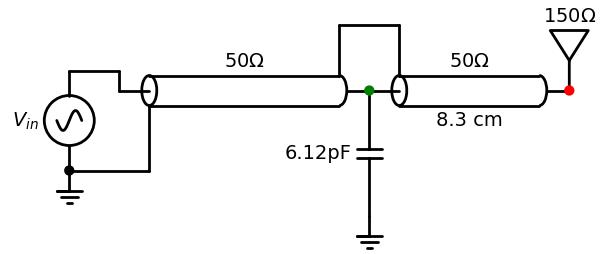

In [15]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot(color='g'))
d.add(Capacitor(l=2.5,d='down', label='6.12pF'))
d.add(Ground())
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='8.3 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 4: Bijplaatsen van een spoel in parallel

We plaatsen $\frac{Z_0}{Z_L}=\frac{1}{3}$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

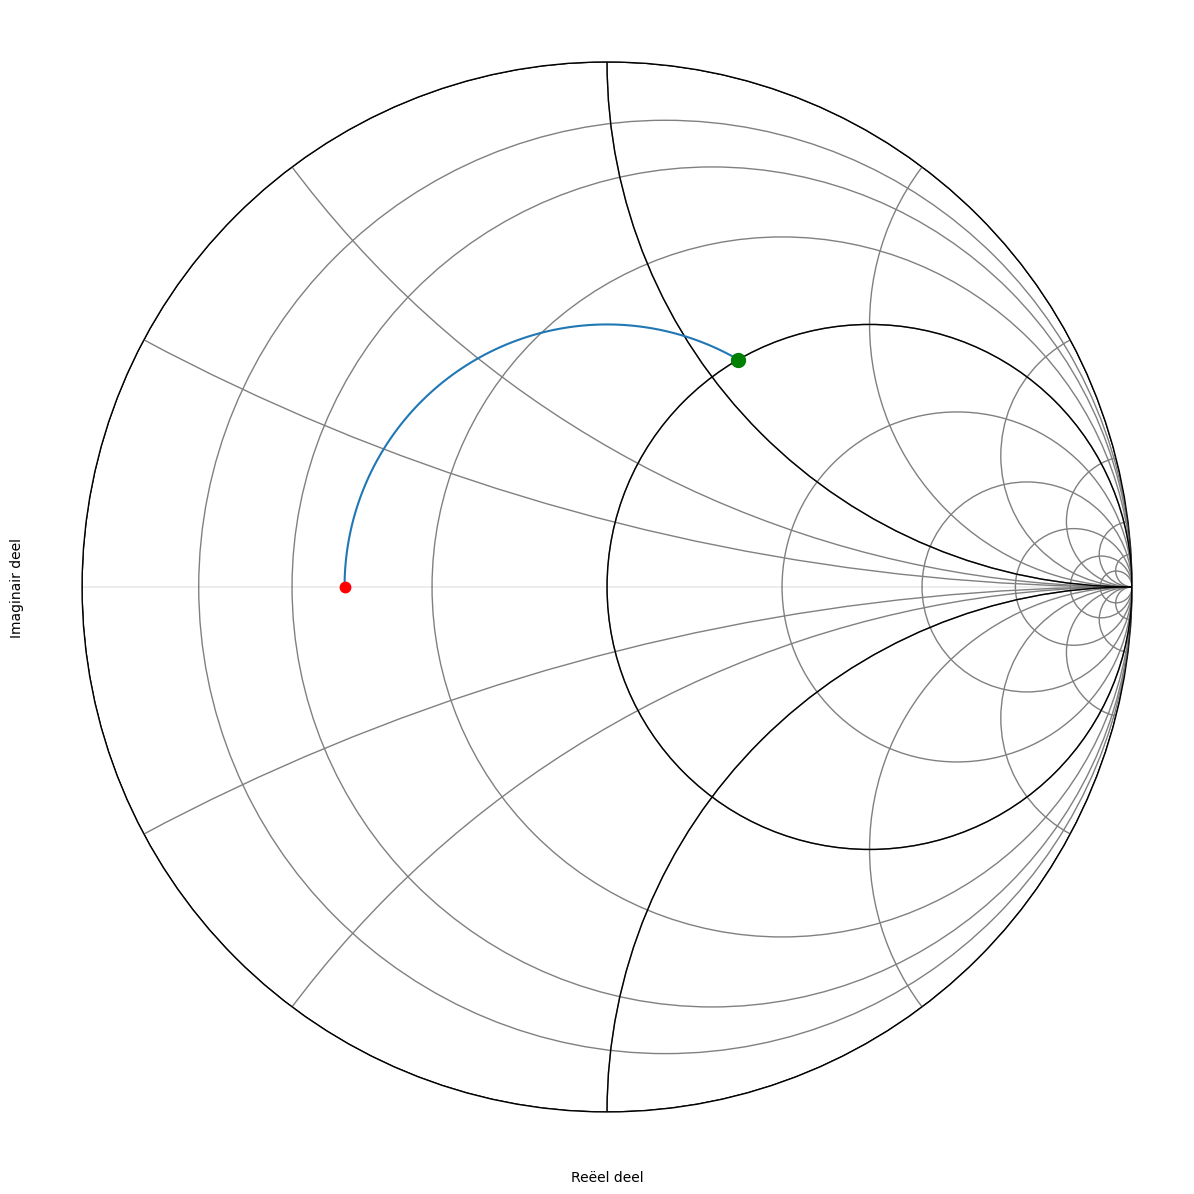

In [16]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,121)]
smitplot(ylijn,Y_0)

In [17]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(118,122)]
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 118    Y= 19.22+22.62j mS     lengte=4.10 cm
 119    Y= 19.60+22.86j mS     lengte=4.13 cm
 120    Y= 20.00+23.09j mS     lengte=4.17 cm
 121    Y= 20.41+23.33j mS     lengte=4.20 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

$$ \frac{1}{j \omega L}= - 0.023 j $$

$$ L =\frac{1}{0.023\cdot  2 \pi \cdot 600 \times 10^6}= 11.5 nH $$

In [18]:
1/0.02309401076758503/2/np.pi/6e8

1.148601865462067e-08

<p class="alert alert-success">
De optimale inductantiewaarde in parallel wordt dus  11.5 nH  de nodige lengte van de coax tussen de antenne en de aanpassing is 4.1 cm 
</p>

Het schema dat we nodig hebben om deze vierde oplossing te realiseren wordt dus:

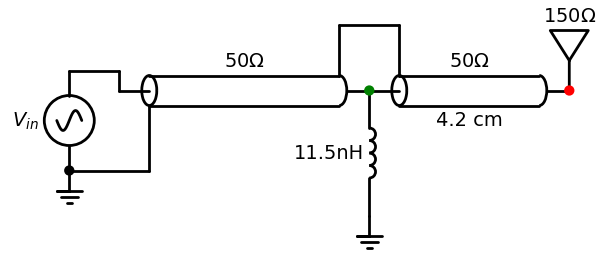

In [19]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot(color='g'))
d.add(Inductor(l=2.5,d='down', label='11.5nH'))
d.add(Ground())
coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='4.2 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 5: Oplossing 3 waarbij de condensator vervangen is door een open transmissielijn

De y = 1 - j 1.15 compenseren we door +j 1.15 vertrekkende vanuit g=0.

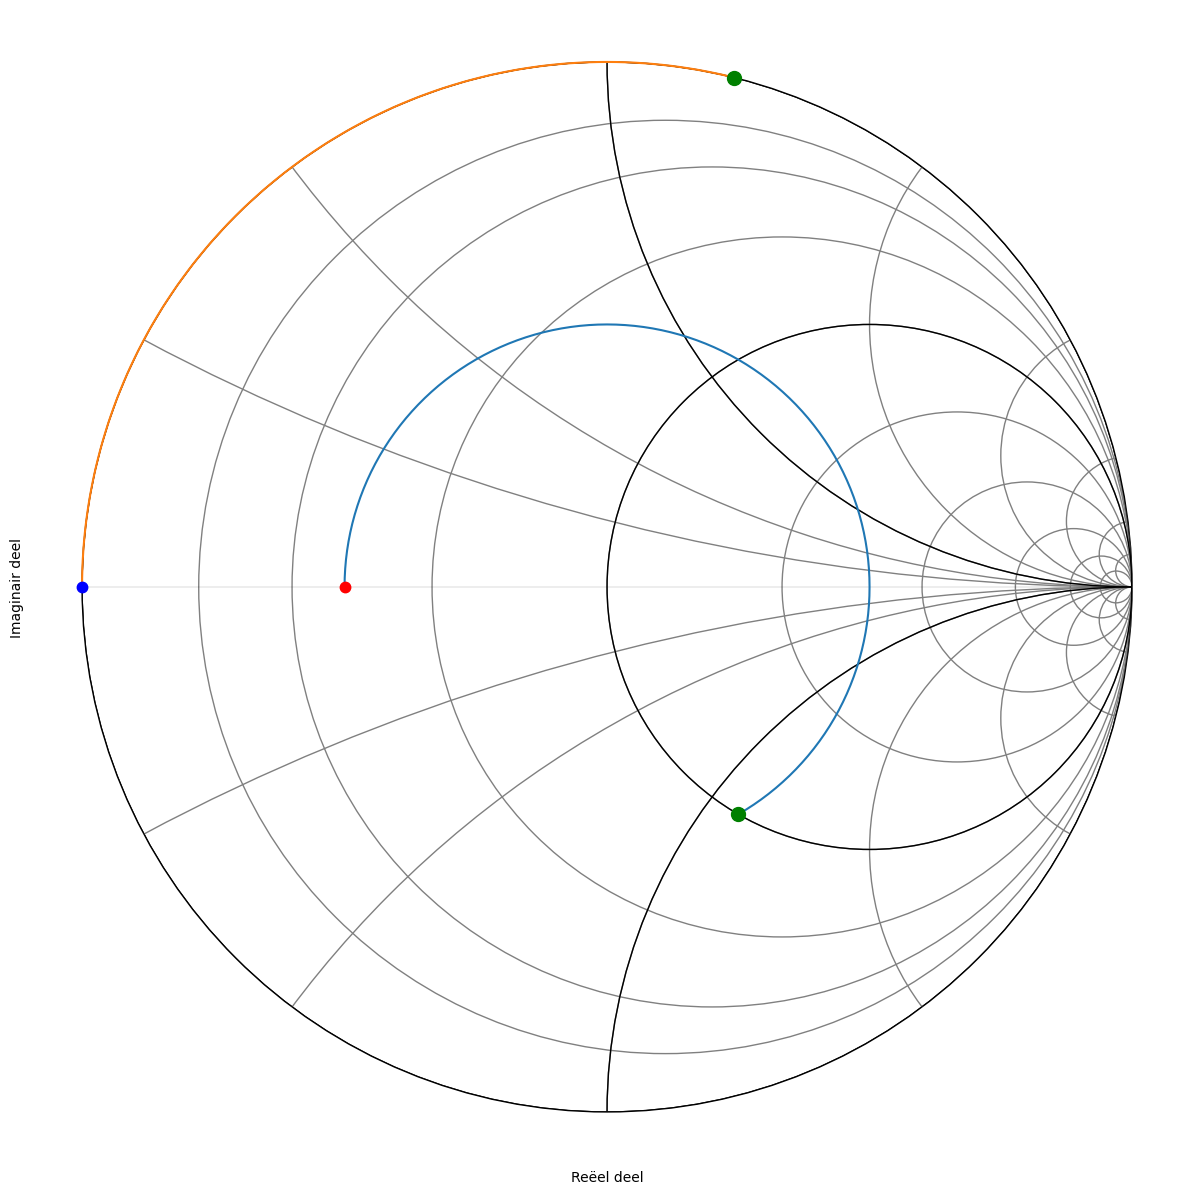

In [20]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,241)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,105)]

def smitplot2(ylijn,yopenlijn,Y_0):
    gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
    gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]
    fig,ax=plt.subplots(figsize=(25,15))
    rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)
    ax.plot([g.real for g in gammaopen],[g.imag for g in gammaopen])
    ax.plot([gamma[-1].real],[gamma[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gamma[0].real],[gamma[0].imag],color='red', marker=".", markersize=15)
    ax.plot([gammaopen[-1].real],[gammaopen[-1].imag],color='green', marker=".", markersize=20)
    ax.plot([gammaopen[0].real],[gammaopen[0].imag],color='blue', marker=".", markersize=15)
smitplot2(ylijn,yopenlijn,Y_0)

In [21]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(238,242)]
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 238    Y= 20.83-23.55j mS     lengte=8.26 cm
 239    Y= 20.41-23.33j mS     lengte=8.30 cm
 240    Y= 20.00-23.09j mS     lengte=8.33 cm
 241    Y= 19.60-22.86j mS     lengte=8.37 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [22]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(95,101)]

def ylijnprint2(ylijn,golflengte=25):
    print('hoek    admittantie (Siemens)     lengte coax (cm)')
    for i,yi in ylijn:
        print('{:4}       Y= {:+.2f}j mS     lengte={:.2f} cm'.format(i,yi.imag*1000, i/360*golflengte/2))

ylijnprint2(yopenlijn)

hoek    admittantie (Siemens)     lengte coax (cm)
  95       Y= +21.83j mS     lengte=3.30 cm
  96       Y= +22.21j mS     lengte=3.33 cm
  97       Y= +22.61j mS     lengte=3.37 cm
  98       Y= +23.01j mS     lengte=3.40 cm
  99       Y= +23.42j mS     lengte=3.44 cm
 100       Y= +23.84j mS     lengte=3.47 cm


<p class=tabcaption> Overzicht van de bekomen admittantie van de open transmissielijn als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

Hieruit blijkt dat een open transmissielijn met de lengte van $\frac{98}{360} \frac{\lambda}{2}$ de beste aanpassing geeft.

<p class="alert alert-success">
Het stukje open coax dat we moeten voorzien ter vervanging van de condensator is dus: 3.4 cm
</p>

Het schema dat we nodig hebben om deze vijfde oplossing te realiseren wordt dus:

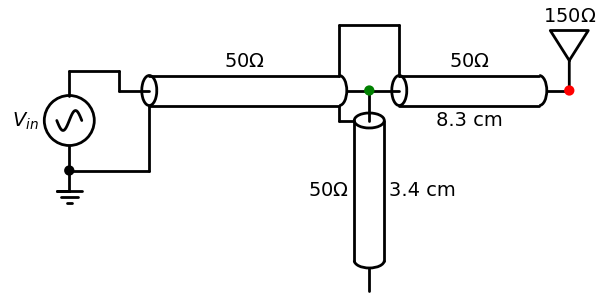

In [23]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label=r'$50\Omega$', botlabel='3.4 cm'))
d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='8.3 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 6: Oplossing 3 waarbij de condensator vervangen is door een kortgesloten transmissielijn

De y = 1 - j 1.15 compenseren we door +j 1.15 vertrekkende vanuit g=$\infty$

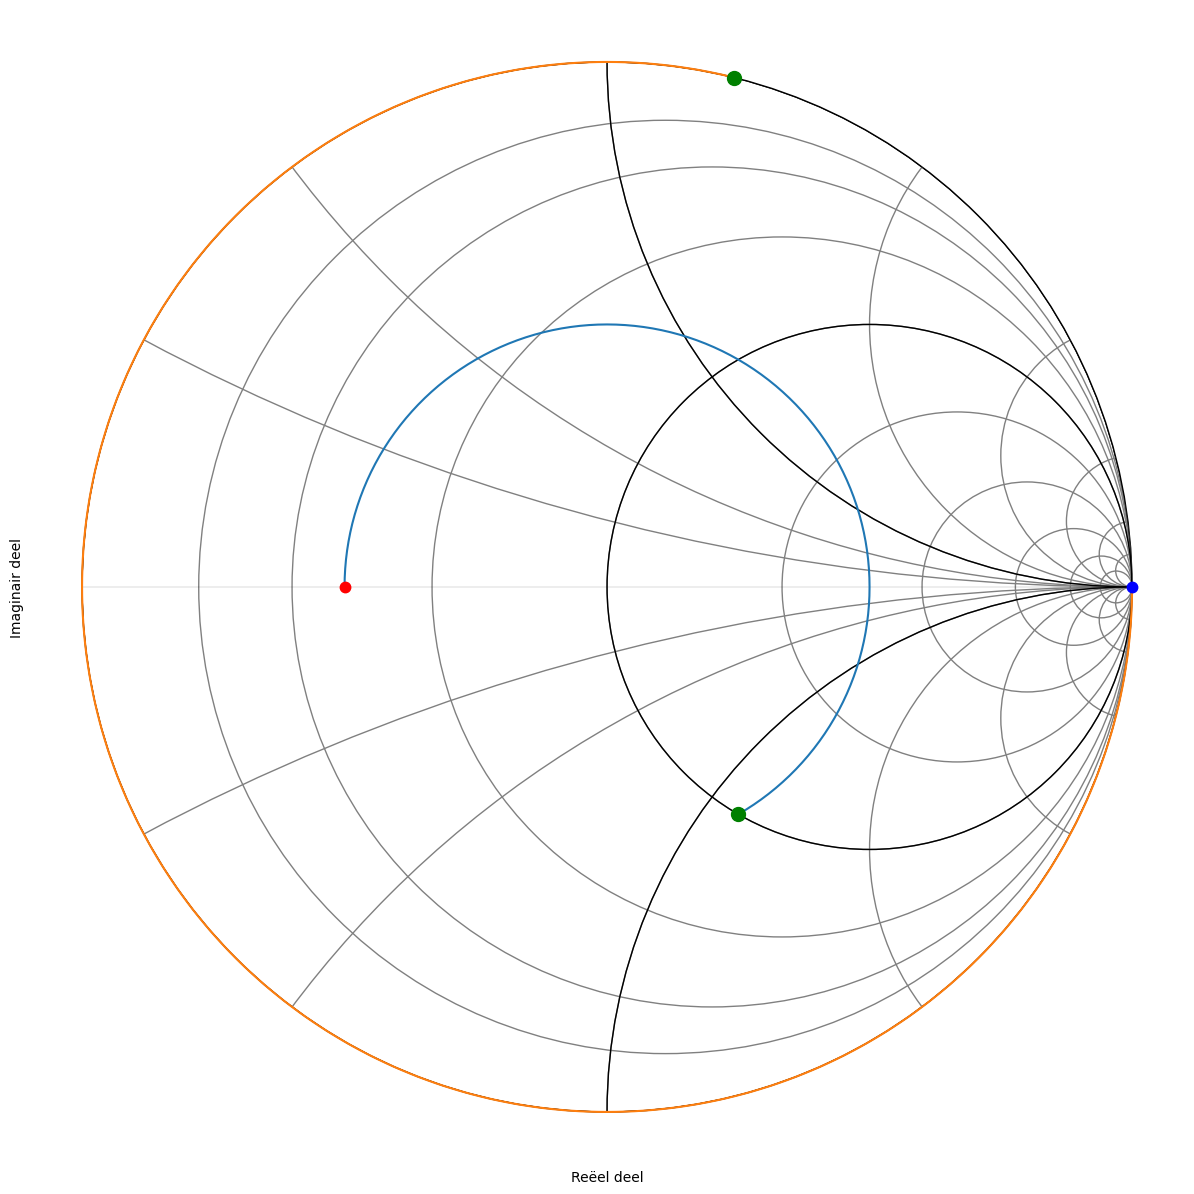

In [24]:
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,241)]
ykortlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(-180,105)]

smitplot2(ylijn,ykortlijn,Y_0)

In [25]:
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(238,242)]
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 238    Y= 20.83-23.55j mS     lengte=8.26 cm
 239    Y= 20.41-23.33j mS     lengte=8.30 cm
 240    Y= 20.00-23.09j mS     lengte=8.33 cm
 241    Y= 19.60-22.86j mS     lengte=8.37 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [26]:
ykortlijn=[(i+180,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(95,101)]
ylijnprint2(ykortlijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 275       Y= +21.83j mS     lengte=9.55 cm
 276       Y= +22.21j mS     lengte=9.58 cm
 277       Y= +22.61j mS     lengte=9.62 cm
 278       Y= +23.01j mS     lengte=9.65 cm
 279       Y= +23.42j mS     lengte=9.69 cm
 280       Y= +23.84j mS     lengte=9.72 cm


<p class=tabcaption> Overzicht van de bekomen admittantie van de kortgesloten transmissielijn als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje kortgesloten coax dat we moeten voorzien ter vervanging van de condensator is dus: 9.7 cm
</p>

Het schema dat we nodig hebben om deze zesde oplossing te realiseren wordt dus:

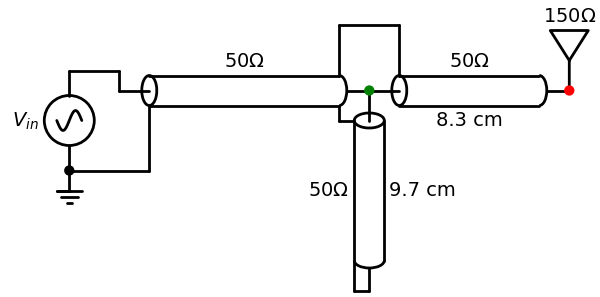

In [27]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label=r'$50\Omega$', botlabel='9.7 cm'))
d.add(Line(tox=coax3.shieldend,d='left'))
d.add(Line(toy=coax3.shieldend,d='up'))

d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='8.3 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 7: Oplossing 4 waarbij het spoel vervangen is door een open transmissielijn

De y = 1 + j 1.15 compenseren we door -j 1.15 vertrekkende vanuit g=0.

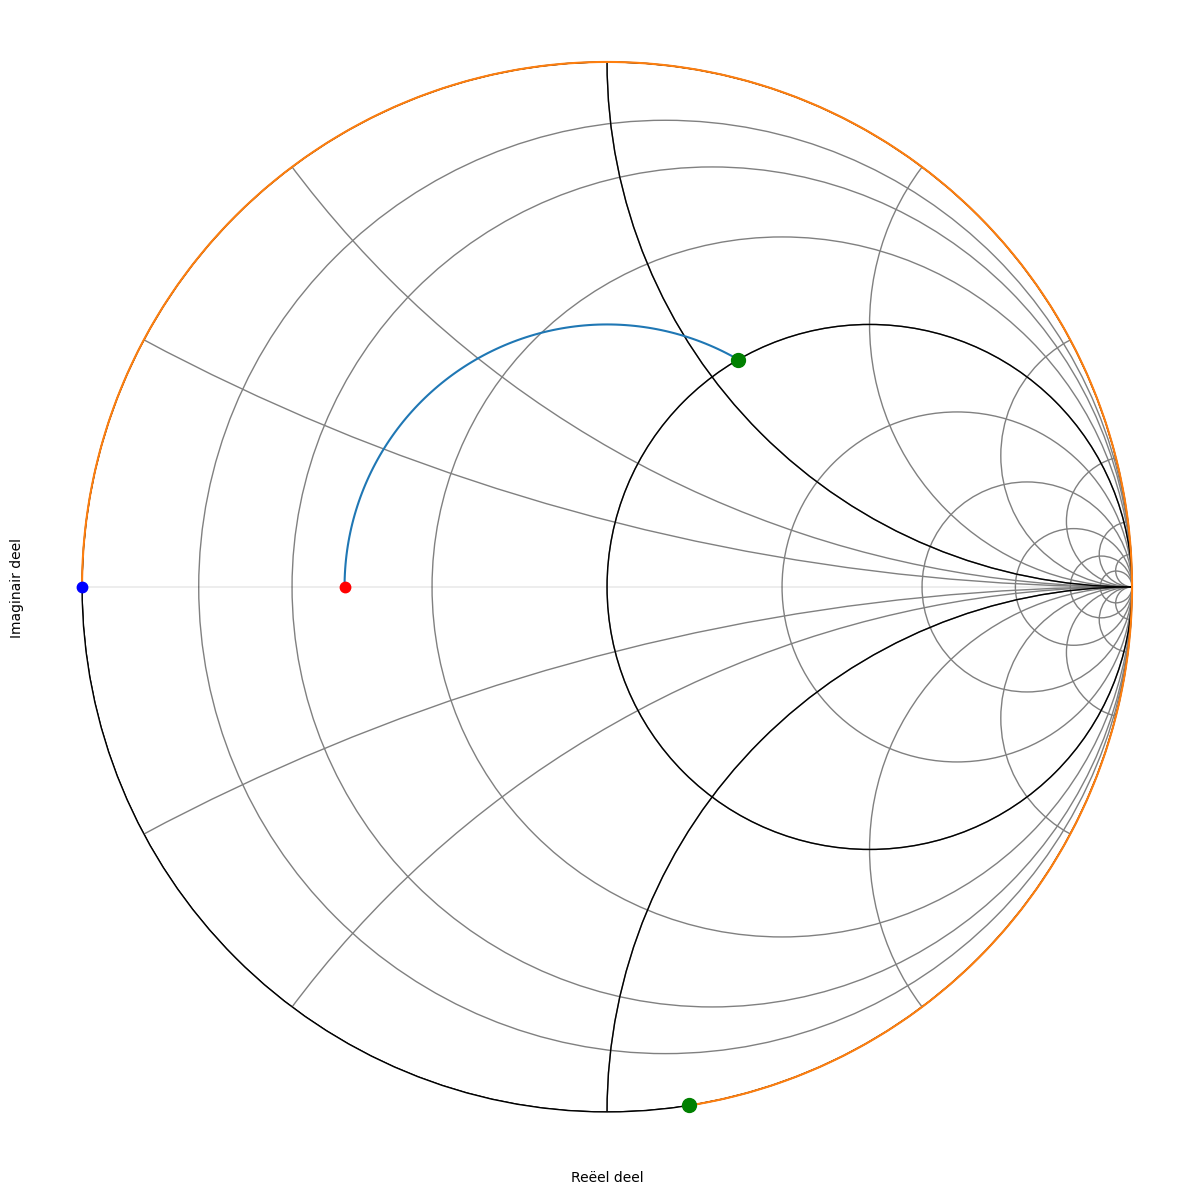

In [28]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,121)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,262)]
smitplot2(ylijn,yopenlijn,Y_0)

In [29]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(118,122)]
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 118    Y= 19.22+22.62j mS     lengte=4.10 cm
 119    Y= 19.60+22.86j mS     lengte=4.13 cm
 120    Y= 20.00+23.09j mS     lengte=4.17 cm
 121    Y= 20.41+23.33j mS     lengte=4.20 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [30]:
yopenlijn=[(i,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(260,265)]
ylijnprint2(yopenlijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 260       Y= -23.84j mS     lengte=9.03 cm
 261       Y= -23.42j mS     lengte=9.06 cm
 262       Y= -23.01j mS     lengte=9.10 cm
 263       Y= -22.61j mS     lengte=9.13 cm
 264       Y= -22.21j mS     lengte=9.17 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

Het schema dat we nodig hebben om deze zevende oplossing te realiseren wordt dus:

<p class="alert alert-success">
Het stukje open coax dat we moeten voorzien ter vervanging van het spoel is dus: 9.1 cm
</p>

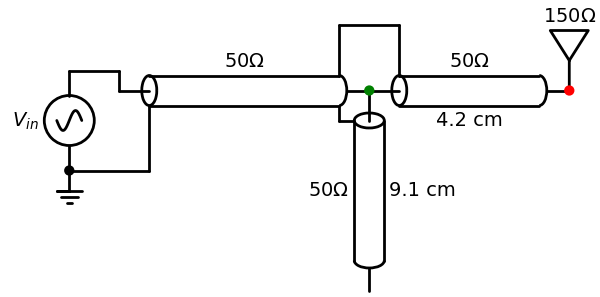

In [31]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label=r'$50\Omega$', botlabel='9.1 cm'))
d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='4.2 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()

### Oplossing 8: Oplossing 4 waarbij het spoel vervangen is door een kortgesloten transmissielijn


De y = 1 + j 1.15 compenseren we door -j 1.15 vertrekkende vanuit g=$\infty$. 

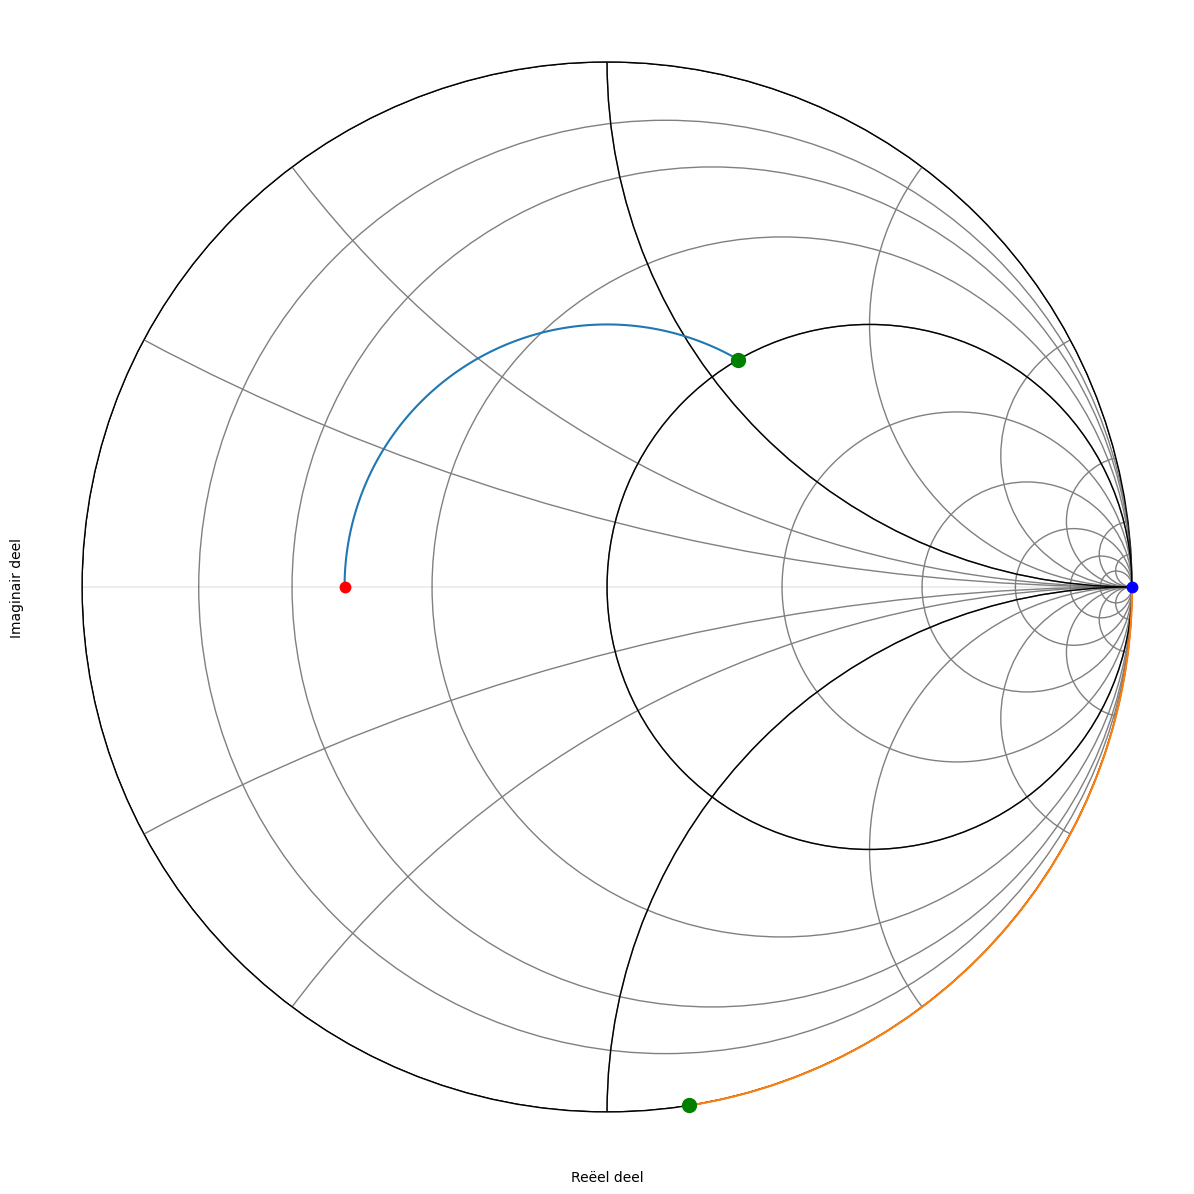

In [32]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,121)]
ykortlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(-180,-98)]
smitplot2(ylijn,ykortlijn,Y_0)

In [33]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[(i,1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0] ) for i in np.arange(118,122)]
ylijnprint(ylijn)

hoek    admittantie (Siemens)     lengte coax (cm)
 118    Y= 19.22+22.62j mS     lengte=4.10 cm
 119    Y= 19.60+22.86j mS     lengte=4.13 cm
 120    Y= 20.00+23.09j mS     lengte=4.17 cm
 121    Y= 20.41+23.33j mS     lengte=4.20 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

In [34]:
ykortlijn=[(i+180,1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0])  for i in np.arange(-100,-95)]
ylijnprint2(ykortlijn)

hoek    admittantie (Siemens)     lengte coax (cm)
  80       Y= -23.84j mS     lengte=2.78 cm
  81       Y= -23.42j mS     lengte=2.81 cm
  82       Y= -23.01j mS     lengte=2.85 cm
  83       Y= -22.61j mS     lengte=2.88 cm
  84       Y= -22.21j mS     lengte=2.92 cm


<p class=tabcaption> Overzicht van de bekomen admittantie als functie van de hoek op de Smith kaart. De laatste kolom geeft de nodige lengte van de coax</p>

<p class="alert alert-success">
Het stukje kortgesloten coax dat we moeten voorzien ter vervanging van het spoel is dus: 2.8 cm
</p>

Het schema dat we nodig hebben om deze achtste oplossing te realiseren wordt dus:

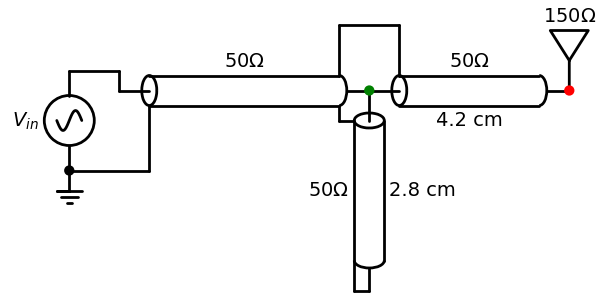

In [35]:
d = schemdraw.Drawing()
d.add(Ground())
d.add(Dot())
bron=d.add(SourceSin(l=2.0,d='up', label=r'$V_{in}$'))
d.add(Line(l=1,d='right') )
d.add(Line(l=0.4,d='down') )
coax1=d.add(Coax(d='right',length=5, label=r'$50\Omega$'))
d.add(Dot(color='g'))
coax3=d.add(Coax(xy=coax1.end,d='down',l=1.5,length=4, label=r'$50\Omega$', botlabel='2.8 cm'))
d.add(Line(tox=coax3.shieldend,d='left'))
d.add(Line(toy=coax3.shieldend,d='up'))

d.add(Line(xy=coax1.shieldend,toy=coax3.shieldstart_top,d='down'))
d.add(Line(tox=coax3.shieldstart,d='right'))

coax2=d.add(Coax(xy=coax1.end,d='right',l=1.5,length=4, label=r'$50\Omega$', botlabel='4.2 cm'))
d.add(Dot(color='r'))
d.add(Antenna( label=r'$150\Omega$'))
d.add(Line(xy=coax1.shieldend_top,l=1,d='up'))
d.add(Line(tox=coax2.shieldstart_top,d='right') )     
d.add(Line(toy=coax2.shieldstart_top,d='down') )     
d.add(Line(xy=bron.start,tox=coax1.shieldstart,d='right') )
d.add(Line(toy=coax1.shieldstart,d='up') )
d.draw()